                                Regressão Vetor Suporte

-> Diferente da regressão linear onde desenhamos uma linha. Na regressão
de vetor suporte, desenhamos uma "faixa", uma zona de tolerância em volta
da linha. Essa zona tem uma espessura que a gente escolhe. A SVR então faz
duas coisas:

-> Tenta encontrar uma linha que seja o mais plana possivel (como se fosse
uma reta).

-> Tenta colocar a maioria dos pontos DENTRO dessa faixa de tolerância, sem
se importar com a posição exata deles lá dentro.

-> A SVR só se preocupa com os pontos que estão fora da caixa ou que estão
exatamente na borda da faixa. Esses pontos são os mais importantes e são chamados de vetores de suporte. Eles são os "pontos de apoio" que a SVR 
usa para a desenhar a linha.

Import das bibliotecas que utilizaremos em todas as funções

In [ ]:
# import dp nosso arquivo de funções (modularização) 
from minhasfuncoes import funcoes 

# Import da biblioteca que realiza cálculos matemáticos e manipulam arrays
import numpy as np

criação da função que irá construir a regressão vetor suporte

In [ ]:

# A função que constroi regressão de vetor suporte irá receber como
# argumento:
# x: valores da caracteristica (experiência em anos)
# y: Variável alvo que queremos prever (salário)
# k: tipo do kernel (modelo da linha) que iremos utilizar
# para fazer a regressão
# d: valor que define a curvatora da linha do modelo polinomial
def computarRegressaoVetorSuporte(x, y, k, d):
    
    # Import da classe SVR da biblioteca skalearn.svm que tem como
    # objetvo criar regressões de vetor suporte
    from sklearn.svm import SVR
    
    # Instância da classe (criação do objeto) do modelo de regressão
    # de vetor de suporte
    regressor = SVR()
    
    # Antes de passarmos o parametro k, vamos verificar se o modelo
    # escolhido é o "poly" (kernel do modelo polinomiar)
    if (k == "poly"):
        
        # Se o valor de k for igual a "poly", vamos adicionar como argumento
        # no costrutor da classe o degree que define a curvatura da linha 
        # polinomial
        regressor = SVR(kernel = k, degree = d)
    
    else:
        
        # Caso seja diferente, iremos apenas passar para o k do construtor o valor atribuido a ele
        regressor = SVR(kernel = k)
    
    # x_train: Ira receber o conjunto de caracteristicas de  treino que irá ensinar o modelo a encontrar tendências e padrões entre as variáveis.
    # x_test: Ira receber o conjunto que o modelo utilizara para realizar
    # a predição
    # y_train: Dados reais da variável alvo que treinarão as respostas
    # do modelo.
    # y_test: Dados reais que serão comparados com o resultado gerado
    # pelo modelo
    # chamada da nossa função de treino e teste de dados:
    # x: conjunto de caracteristicas que serão divididas em treino e
    # e teste
    # y: variável alvo que será dividida em treino e teste 
    x_train, x_test, y_train, y_test = funcoes.treino_teste(x, y, 0.2)
    
    # Função da classe SVR que irá treinar o modelo usando os dados
    # de treino
    regressor.fit(x_train, np.ravel(y_train))
    
    # Retorno do modelo de suporte treinado 
    return regressor
    

Criação da função que irá realizar a construção do gráfico do modelo

In [ ]:
# A função de construção de gráfico ira receber como argumento.
# xpoints: Dados reais da experiencia em anos que serão representados
# pelos pontos.
# ypoints: Dados reais dos valores que queremos prever (salário) que serão
# representados pelos pontos.
# xline:  Dados reais da experiencia em anos que serão representados
# pela linha de previsão do modelo.
# yline: Dados reais dos valores que queremos prever (salário) que serão
# representados pela linha de previsão do modelo.
def showPlot(xpoints, ypoints, xline, yline):
    
    # Import da biblioteca que permite a construção e manipulação de
    # gráficos.
    import matplotlib.pyplot as plt
   
   # função que irá criar os pontos do gráfico
   # xpoints: Valores das caracteristicas representadas por pontos.
   # ypoints: Valores da variável alvo que serão representados por
   # pontos
   # color: cor dos pontos no gráfico
    plt.scatter(xpoints, ypoints, color = 'red')
    
   # função que irá criar as linhas do gráfico
   # xline: Valores das caracteristicas que a linha ira usar para prever
   # os resultados.
   # yline: Valores da variável alvo que o modelo preveu
   # color: cor da linha no gráfico
    plt.plot(xline, yline, color='blue')
    
    # Ira definir o titulo do gráfico
    plt.title("Comparando os pontos reais com a reta produzida pela regressão vetor suporte")
    
    # Ira definir o rótulo do eixo x
    plt.xlabel("Experiência em anos")
    
    # Ira definir o rótulo do eixo y
    plt.ylabel("Salário")
    
    # Irá exibir o gráfico na tela
    plt.show()
    

Criação do método que irá aplicar a construção da regressão vetor suporte

In [123]:
def regressorVetorSuporte(nome_arquivo, delimitador = None):
    
    import time
    
    tempo_inicial = time.time()
    
    x, y = funcoes.carregar_Dataset(nome_arquivo, delimitador)
    
    tempo_necessario = time.time() - tempo_inicial
    
    print("Tempo necessário para o carregamento do dataset na memória: ", round(tempo_necessario,3), " segundos")
    
    tempo_inicial = time.time()
    
    x, scaleX = funcoes.normalizacao(x.reshape(-1, 1))
    
    y, scaleY = funcoes.normalizacao(np.reshape(y, (-1, 1)))
    
    tempo_necessario = time.time() - tempo_inicial
    
    print("Tempo necessário para normalização dos dados: ", round(tempo_necessario, 3), " segundos")
    
    tempo_inicial = time.time()
    
    svrModel = computarRegressaoVetorSuporte(x, y, "poly", 3)
    
    tempo_necessario = time.time() - tempo_inicial
    
    print("Tempo necessário para construção do modelo: ",round(tempo_necessario, 3), " segundos")
    
    
    tempo_inicial = time.time()
    
    svrModel = computarRegressaoVetorSuporte(x, y, "linear", 3)
    
    tempo_necessario = time.time() - tempo_inicial
    
    print("Tempo necessário para construção do modelo: ",round(tempo_necessario, 3), " segundos")
    
    showPlot(scaleX.inverse_transform(x), scaleY.inverse_transform(y), scaleX.inverse_transform(x), scaleY.inverse_transform(svrModel.predict(x).reshape(-1, 1)))

Tempo necessário para o carregamento do dataset na memória:  0.017  segundos
Tempo necessário para normalização dos dados:  0.008  segundos
Tempo necessário para construção do modelo:  0.005  segundos
Tempo necessário para construção do modelo:  0.001  segundos


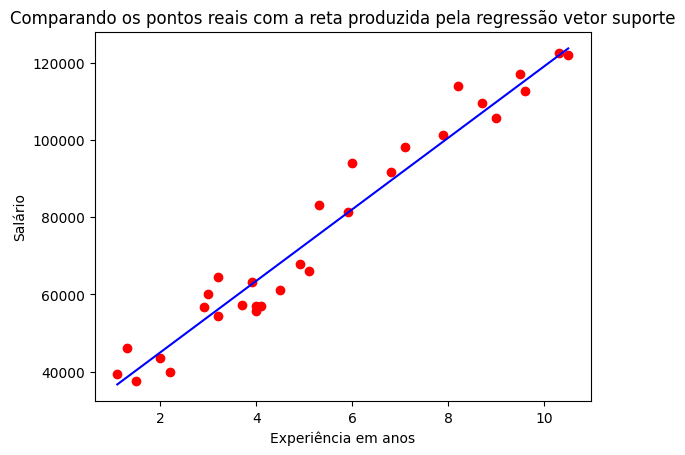

In [124]:
regressorVetorSuporte('Dados/salary.csv', ';')